# Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

# Import necessary Python Modules¶

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loadindg the data set
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
#print first 5 rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Data Summary
df.shape

(7043, 21)

In [4]:
df.isnull().sum().sort_values(ascending=False)

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

In [5]:
#find duplicates
df.duplicated().sum()

0

In [6]:
#checing datatypes of each column
df.dtypes.sort_values(ascending=False)

customerID           object
gender               object
TotalCharges         object
PaymentMethod        object
PaperlessBilling     object
Contract             object
StreamingMovies      object
StreamingTV          object
TechSupport          object
DeviceProtection     object
OnlineBackup         object
OnlineSecurity       object
InternetService      object
MultipleLines        object
PhoneService         object
Dependents           object
Partner              object
Churn                object
MonthlyCharges      float64
tenure                int64
SeniorCitizen         int64
dtype: object

In [7]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of customerID 

5375-XLDOF    1
7753-USQYQ    1
8008-OTEZX    1
5922-ABDVO    1
6133-OZILE    1
             ..
5457-COLHT    1
6542-LWGXJ    1
4560-WQAQW    1
6910-HADCM    1
2034-CGRHZ    1
Name: customerID, Length: 7043, dtype: int64
*******************************************************
*******************************************************
Value counts of gender 

Male      3555
Female    3488
Name: gender, dtype: int64
*******************************************************
*******************************************************
Value counts of SeniorCitizen 

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
*******************************************************
*******************************************************
Value counts of Partner 

No     3641
Yes    3402
Name: Partner, dtype: int64
*******************************************************
*******************************************************


<AxesSubplot:ylabel='OnlineSecurity'>

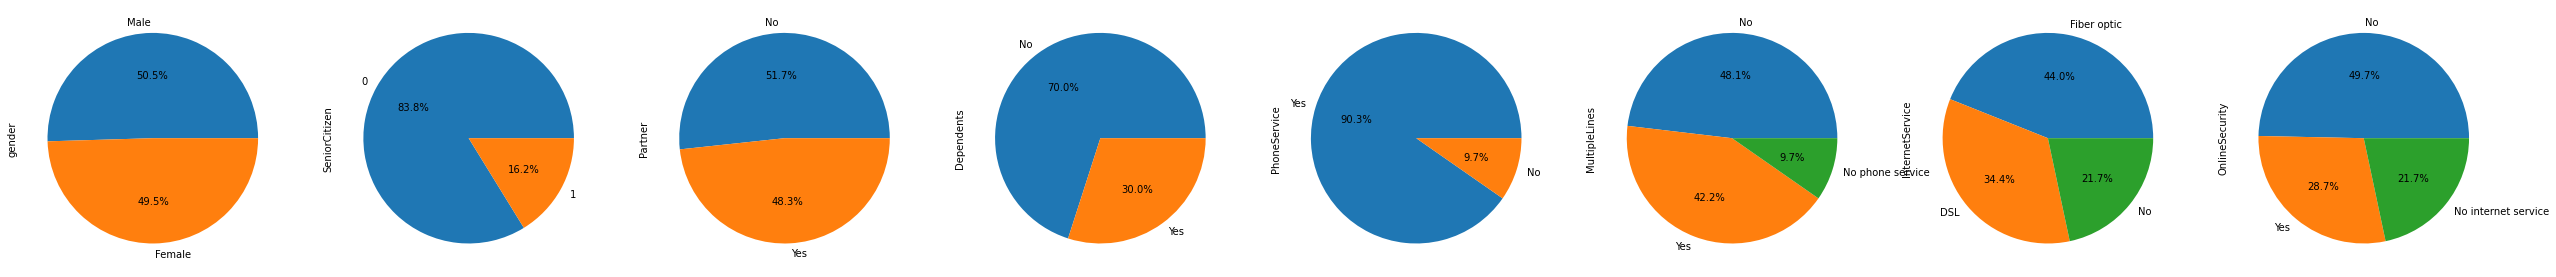

In [11]:
plt.figure(figsize=(50,25))
plt.subplot(1,9,1)
df['gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,2)
df['SeniorCitizen'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,3)
df['Partner'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,4)
df['Dependents'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,5)
df['PhoneService'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,6)
df['MultipleLines'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,7)
df['InternetService'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,8)
df['OnlineSecurity'].value_counts().plot.pie(autopct='%1.1f%%')


<AxesSubplot:ylabel='Churn'>

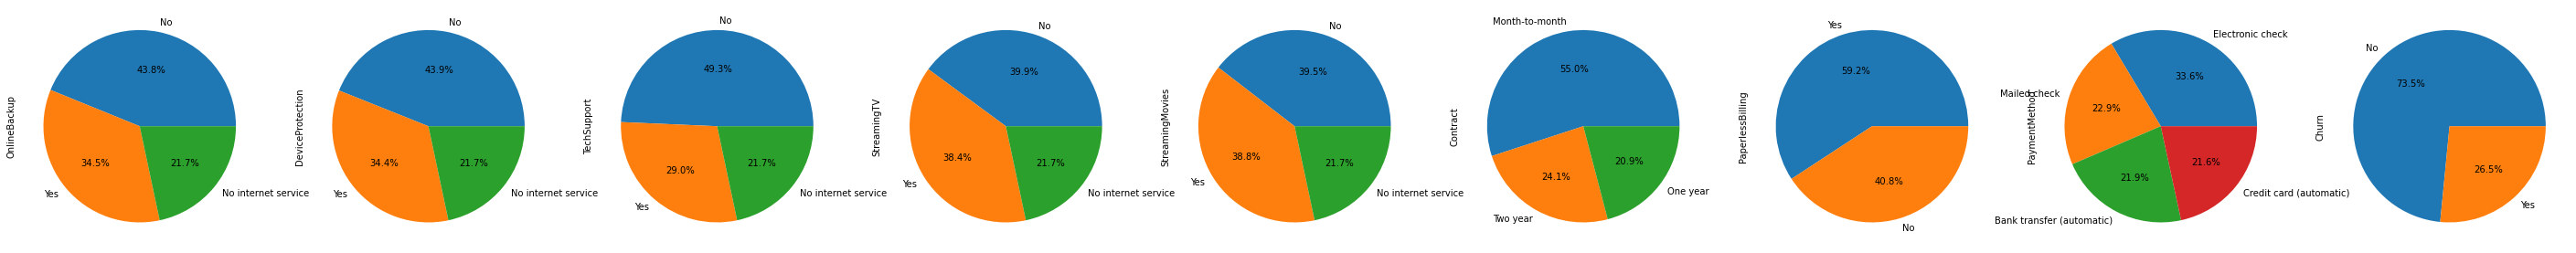

In [13]:
plt.figure(figsize=(50,25))
plt.subplot(1,9,1)
df['OnlineBackup'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,2)
df['DeviceProtection'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,3)
df['TechSupport'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,4)
df['StreamingTV'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,5)
df['StreamingMovies'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,6)
df['Contract'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,7)
df['PaperlessBilling'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,8)
df['PaymentMethod'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,9)
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%')


# Dropping Unnecessary Columns

1) customerID (OBJECT DATATYPE)
each ID is different for each customer, which is an identifier.
we shall drop this column

In [14]:
df=df.drop(columns = ['customerID'])

In [15]:
df = df.reset_index()
df = df.drop(columns = 'index')

In [16]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# ENCODING

In [17]:
from sklearn.preprocessing import LabelEncoder
for col_name in df.columns:
    series = df[col_name]
    label_encoder = LabelEncoder()
    df[col_name] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )

In [18]:
#checing datatypes of each column
df.dtypes.sort_values(ascending=False)

MonthlyCharges      int64
tenure              int64
SeniorCitizen       int64
gender              int32
TechSupport         int32
TotalCharges        int32
PaymentMethod       int32
PaperlessBilling    int32
Contract            int32
StreamingMovies     int32
StreamingTV         int32
DeviceProtection    int32
OnlineBackup        int32
OnlineSecurity      int32
InternetService     int32
MultipleLines       int32
PhoneService        int32
Dependents          int32
Partner             int32
Churn               int32
dtype: object

In [19]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of gender 

1    3555
0    3488
Name: gender, dtype: int64
*******************************************************
*******************************************************
Value counts of SeniorCitizen 

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
*******************************************************
*******************************************************
Value counts of Partner 

0    3641
1    3402
Name: Partner, dtype: int64
*******************************************************
*******************************************************
Value counts of Dependents 

0    4933
1    2110
Name: Dependents, dtype: int64
*******************************************************
*******************************************************
Value counts of tenure 

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
**********

In [20]:
df.isnull().sum().sort_values(ascending=False)

gender              0
SeniorCitizen       0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
Churn               0
dtype: int64

In [21]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,683.524776,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,478.511521,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,199.000000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,722.000000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1090.000000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1584.000000,6530.000000,1.000000


0    5174
1    1869
Name: Churn, dtype: int64


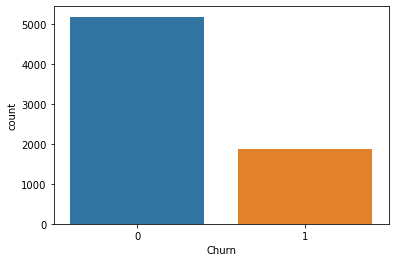

In [22]:
ax=sns.countplot(x="Churn", data=df)
print(df['Churn'].value_counts())

In [ ]:
#There is a problem of class imbalance here and hence we would have to either do upsampling or downsampling depending on the size of the dataset.

#Since the amount of upsampling needed would be around '3 times' we would be better doing downsampling to avoid any foreign data or unwanted data.

# We will peform downsampling at a later stage

<AxesSubplot:>

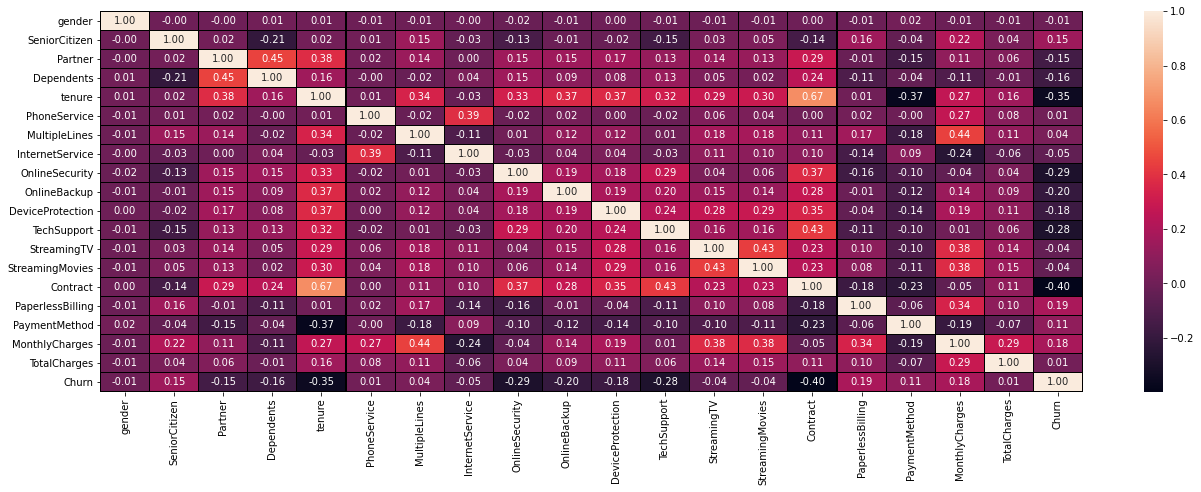

In [23]:
#Correlation using HEATMAP
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [ ]:
#churn and tenure have a correlation of 0.67

In [24]:
#Correlation with the target column
corr_mat=np.abs(df.corr())
corr_mat['Churn'].sort_values(ascending=False)

Churn               1.000000
Contract            0.396713
tenure              0.352229
OnlineSecurity      0.289309
TechSupport         0.282492
OnlineBackup        0.195525
PaperlessBilling    0.191825
MonthlyCharges      0.183523
DeviceProtection    0.178134
Dependents          0.164221
SeniorCitizen       0.150889
Partner             0.150448
PaymentMethod       0.107062
InternetService     0.047291
StreamingMovies     0.038492
MultipleLines       0.038037
StreamingTV         0.036581
TotalCharges        0.014479
PhoneService        0.011942
gender              0.008612
Name: Churn, dtype: float64

In [25]:
#As per the above details, there is no feature which has high correlation with the target column.
#Also, there is no major correlaton among the features 

# DIVIDE DATA INTO FEATURES & LABEL

In [26]:
#diving the columns in feature and label
X = df.drop(columns=['Churn'])
y = df['Churn']

# DATA VISUALIZATION

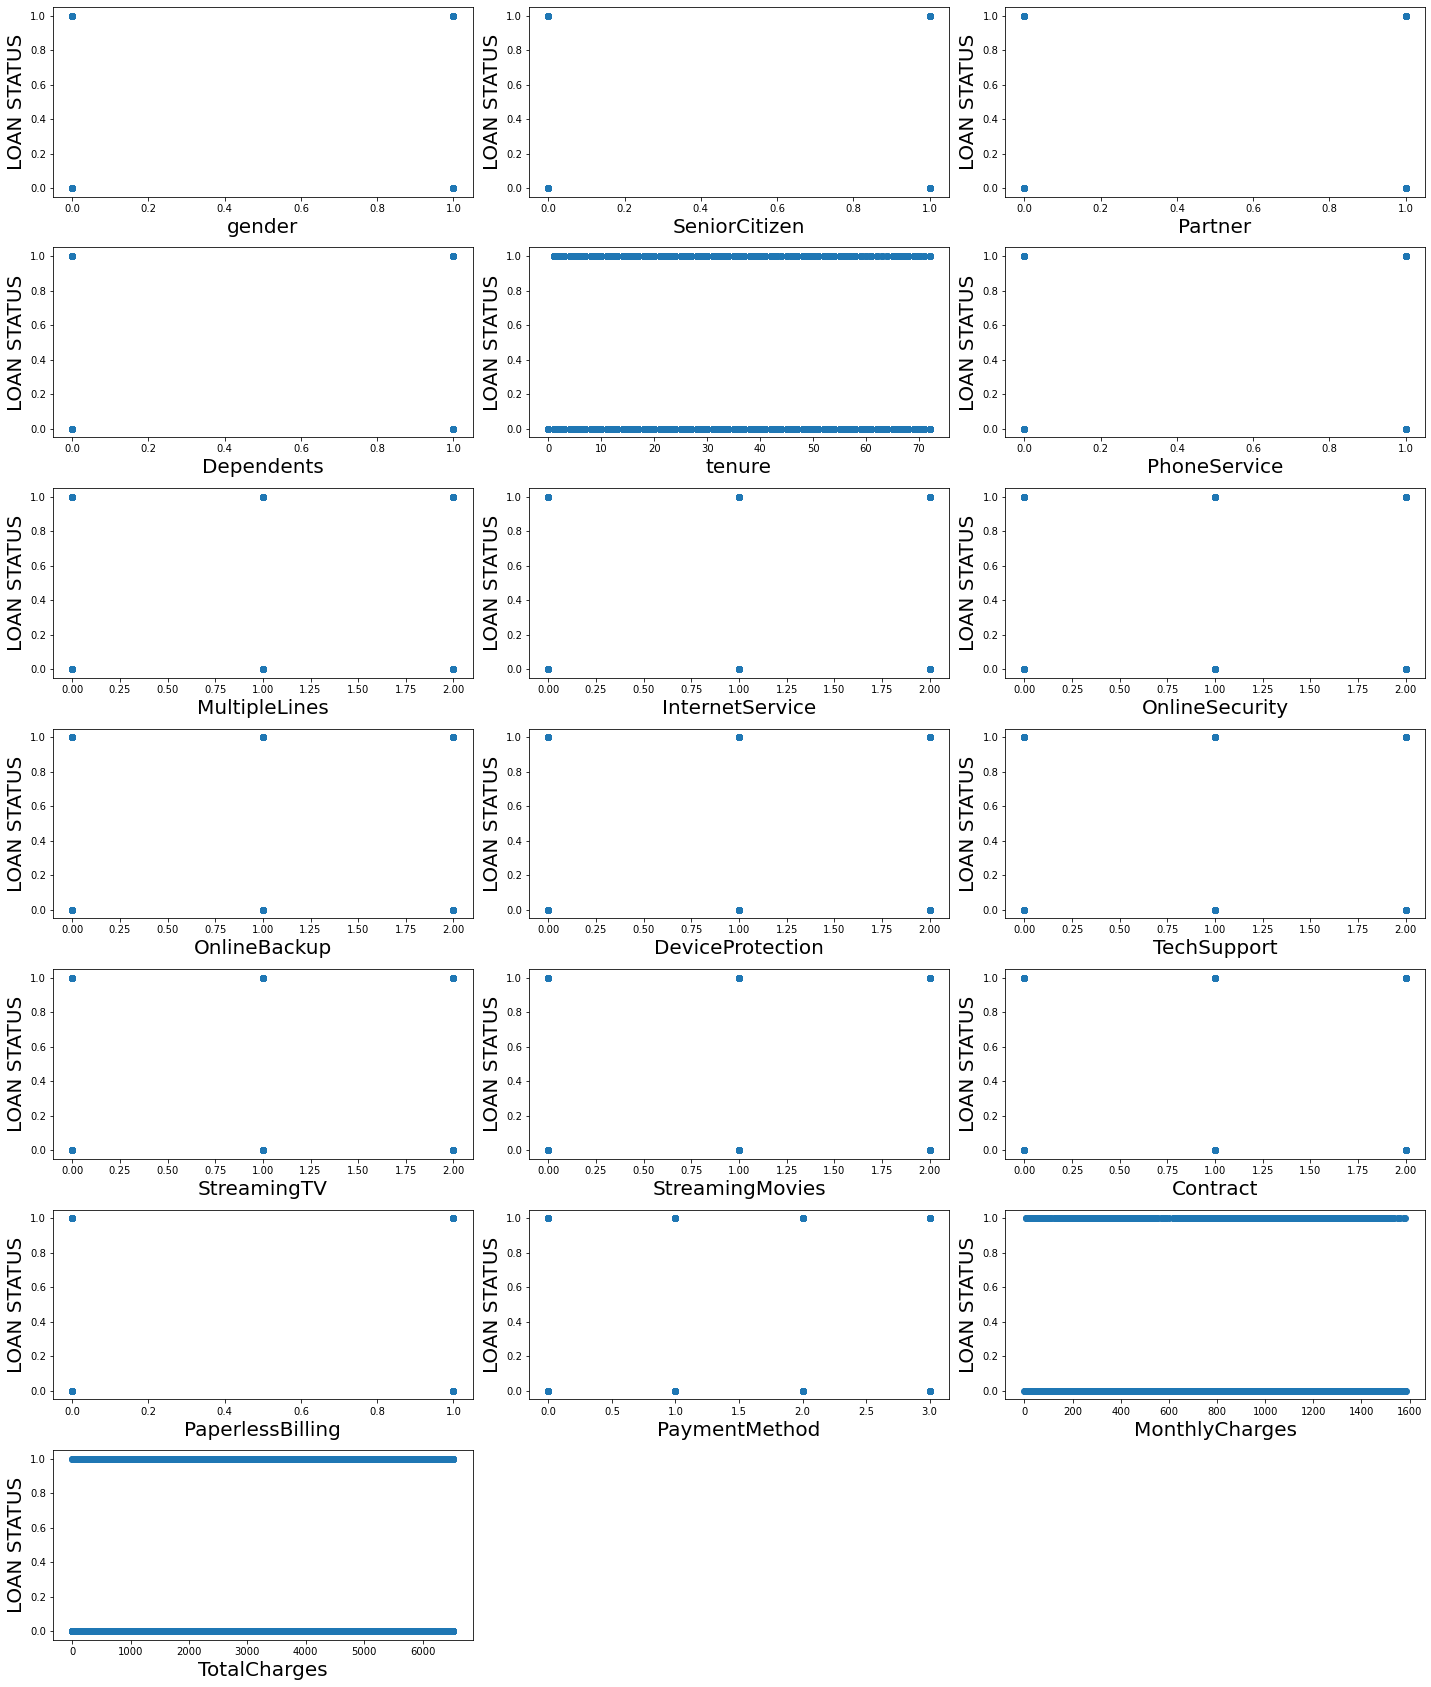

In [27]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
	if plotnumber<=30: 
		ax=plt.subplot(10,3,plotnumber)
		plt.scatter(X[column],y)
		plt.xlabel(column,fontsize=20)
		plt.ylabel('LOAN STATUS', fontsize=20)
	plotnumber+=1
plt.tight_layout()

In [28]:
#all the features are linearly related to the target variable

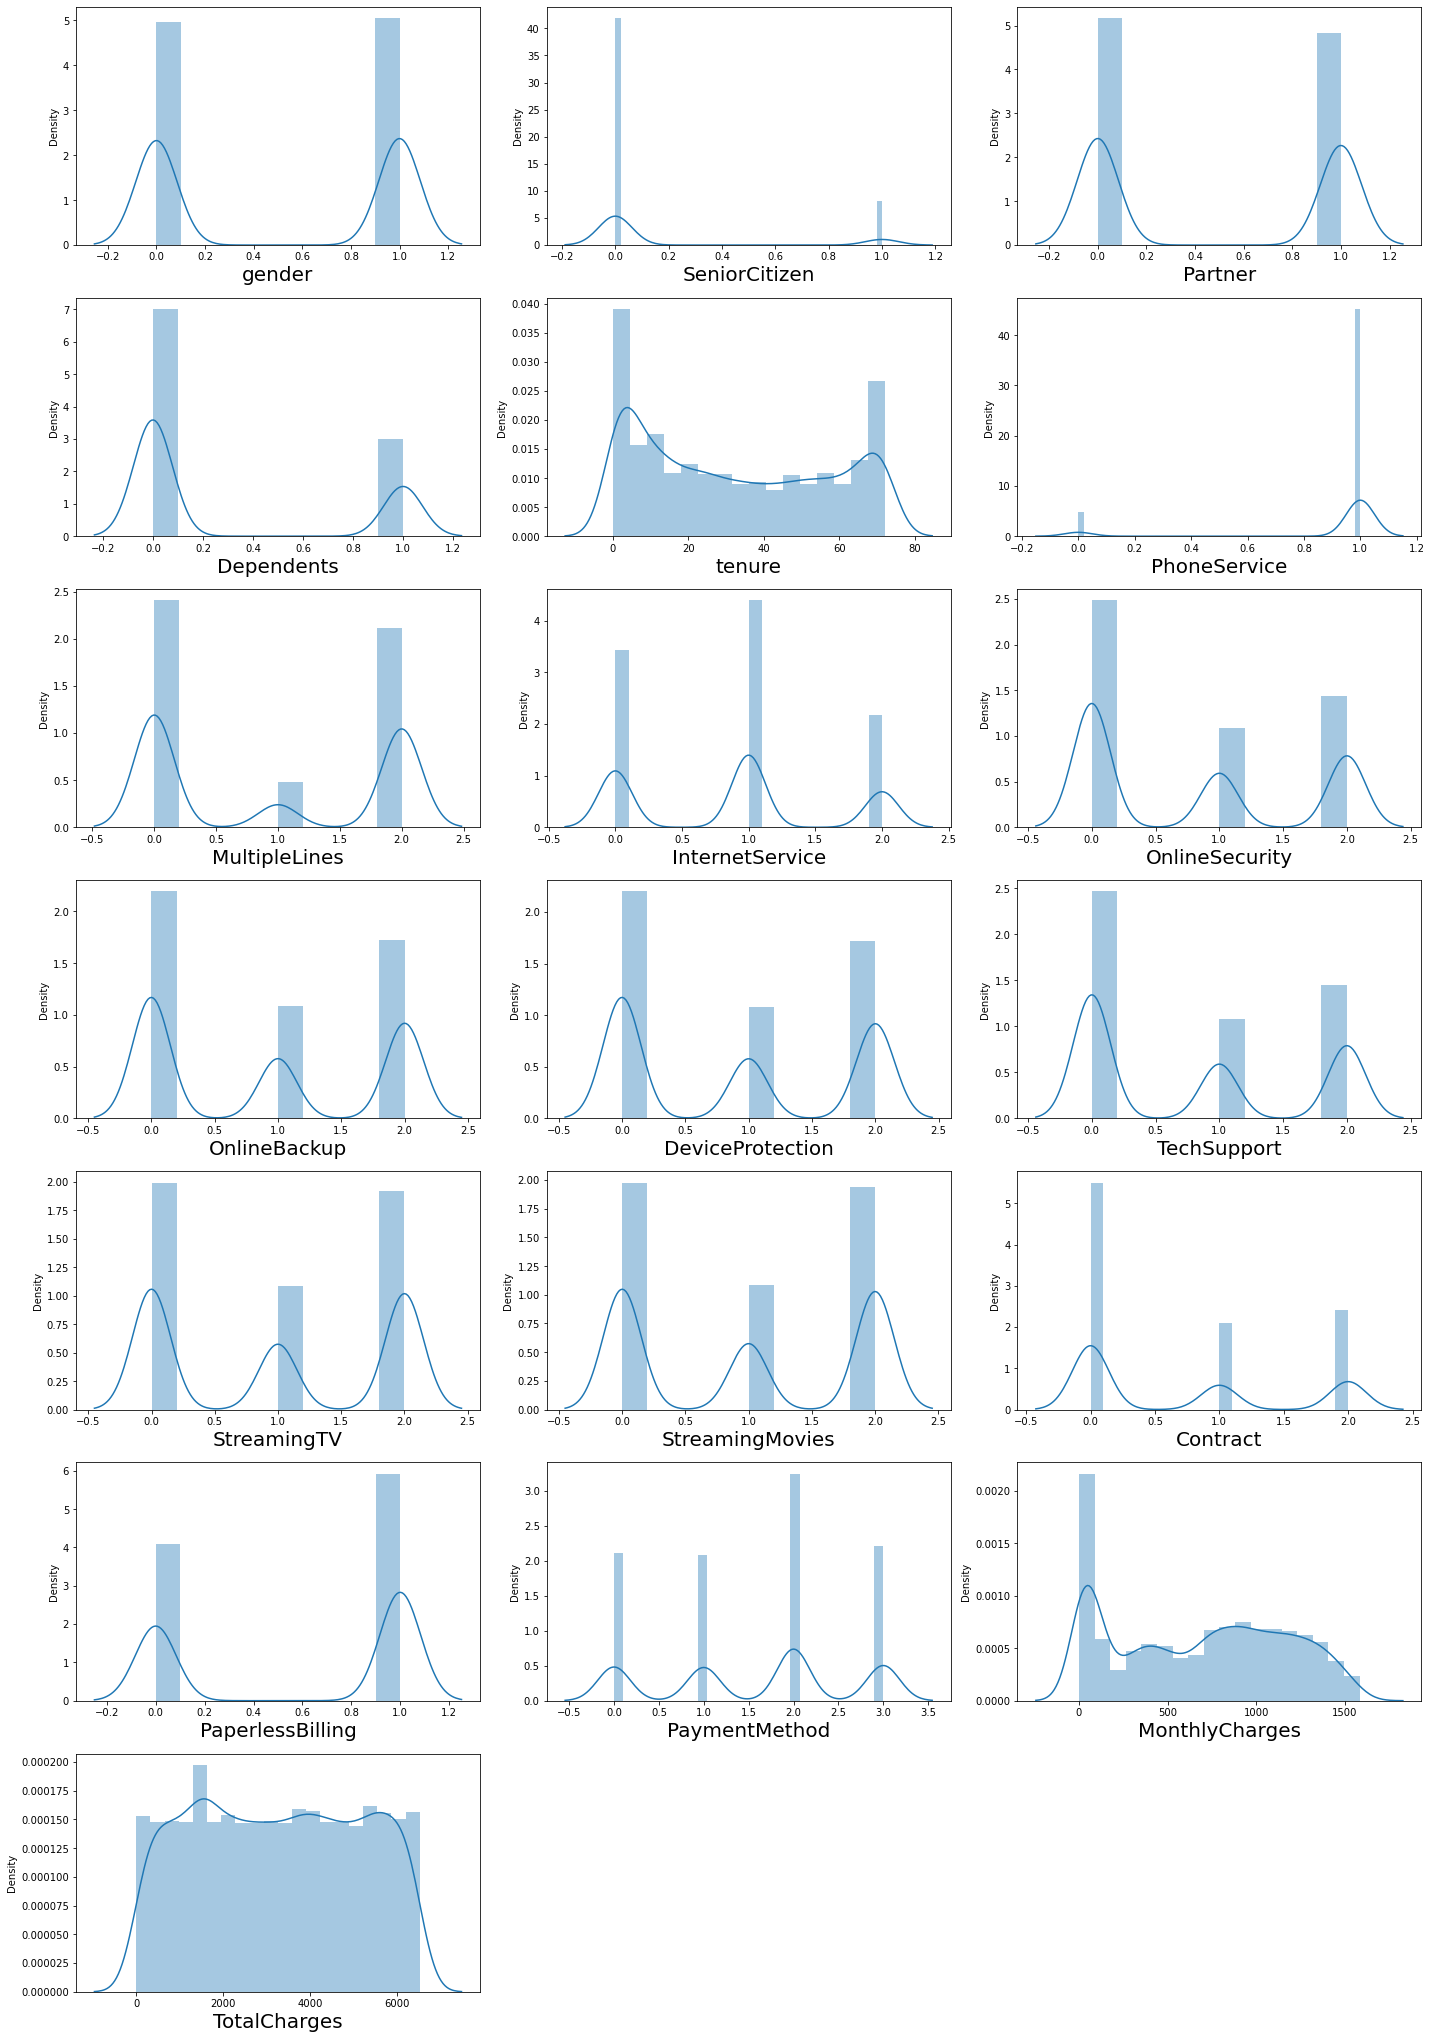

In [29]:
#Visualise the distribution of data in the feature columns(DISTRIBUTION PLOT)

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [ ]:
#MonthlyCharges is highly right skewed

In [30]:
#Checking skewness of the features
X.skew().sort_values(ascending=False)

SeniorCitizen       1.833633
Dependents          0.875199
Contract            0.630959
OnlineSecurity      0.416985
TechSupport         0.402365
tenure              0.239540
InternetService     0.205423
DeviceProtection    0.186847
OnlineBackup        0.182930
MultipleLines       0.118719
Partner             0.067922
StreamingTV         0.028486
TotalCharges        0.015857
StreamingMovies     0.014657
MonthlyCharges      0.014263
gender             -0.019031
PaymentMethod      -0.170129
PaperlessBilling   -0.375396
PhoneService       -2.727153
dtype: float64

In [ ]:
#Since all the skewed data is a categorical one, there will be no much of a difference after the transformation.
#Hence, we will not treat with a transformation

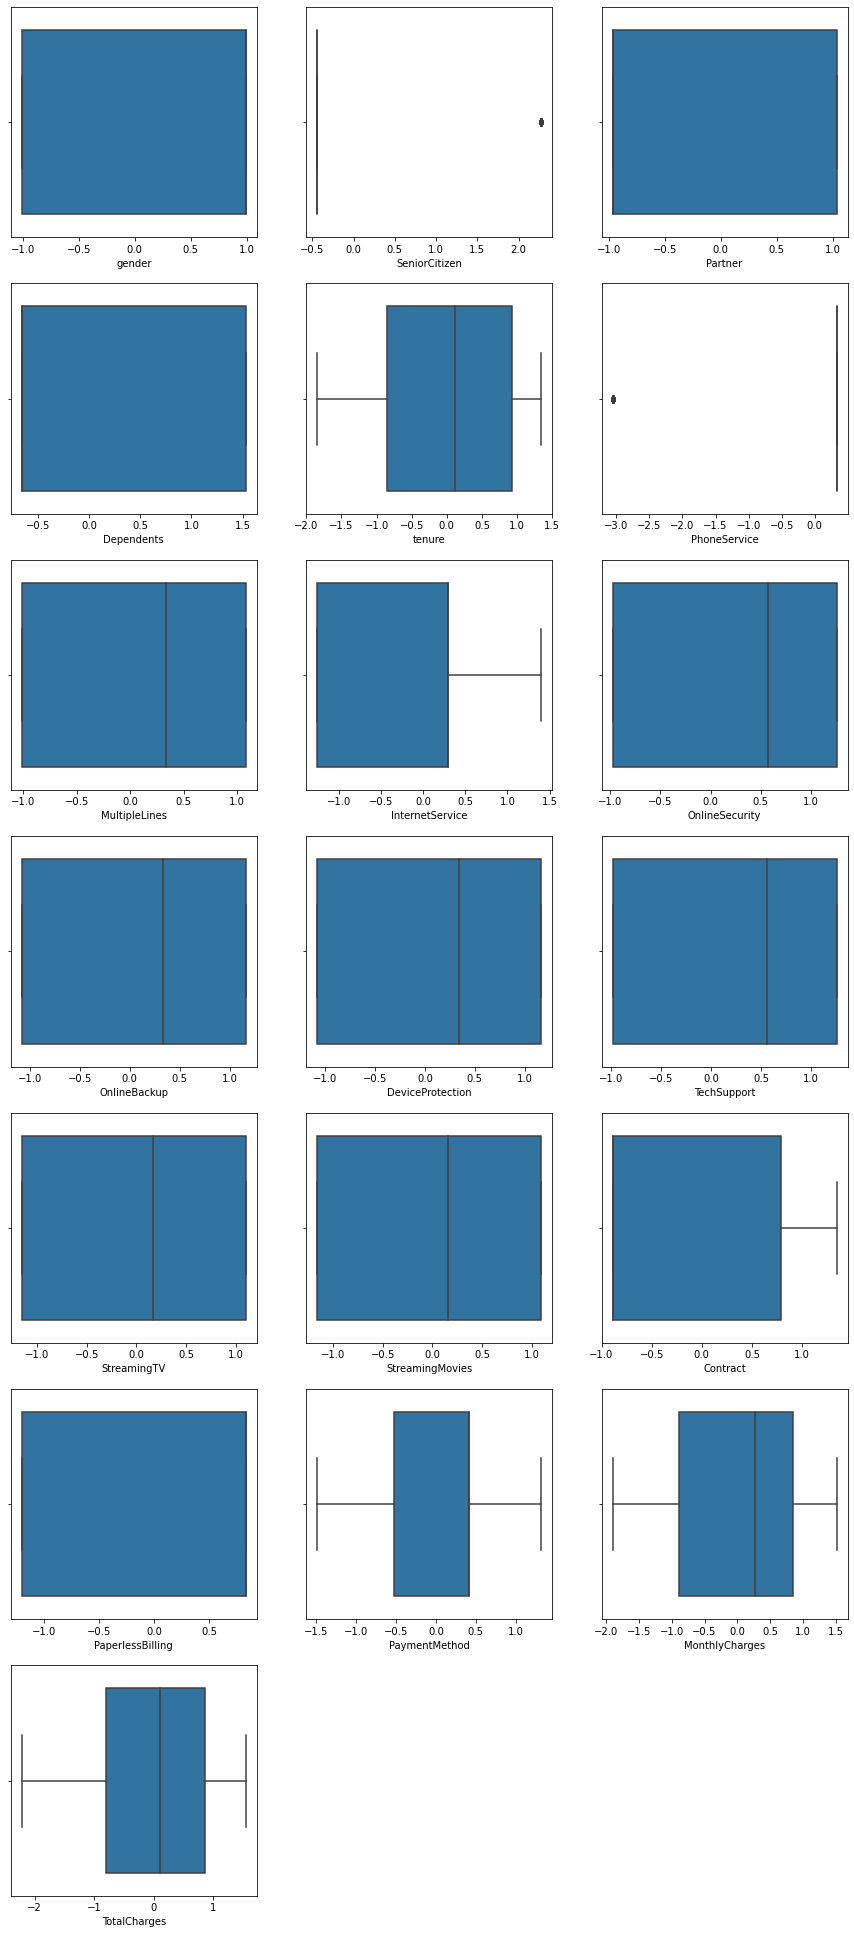

In [32]:
#Visualizing the outliers using BOXPLOT

plt.figure(figsize=(15,50))
graph=1

for column in X:
	if graph<=30: 
		ax=plt.subplot(10,3,graph)
		sns.boxplot(X[column],orient='v')
		plt.xlabel(column,fontsize=10)
	graph+=1
plt.show()

In [33]:
#There does not seem to be any major outliers either in the dataset

In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


In [35]:
#Data Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [36]:
#Finding best random_state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

maxAccu=0 #maximum accuracy
maxRS=0 #best random state value for which max accuracy is acheived 
for i in range(1,200):
	x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
	LR = LogisticRegression()
	LR.fit(x_train,y_train)
	predrf=LR.predict(x_test)
	acc=accuracy_score(y_test,predrf)
	if acc>maxAccu:
		maxAccu=acc
		maxRS=i
print("Best accuracy is", maxAccu,"on Random State", maxRS)

Best accuracy is 0.8282469836763662 on Random State 24


In [37]:
#CREATING TRAIN-TEST SPLIT
x_train_imb, x_test, y_train_imb, y_test =  train_test_split(X, y, test_size=0.20, random_state=24)

In [38]:
print(x_train_imb.shape)
print(y_train_imb.shape)
print(x_test.shape)
print(y_test.shape)

(5634, 19)
(5634,)
(1409, 19)
(1409,)


# USING SMOTE FOR DOWN-SAMPLING

0    5174
1    1869
Name: Churn, dtype: int64


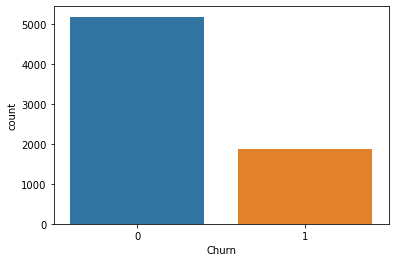

In [39]:
#count of each class (Attrition(1) = 237, NoAttrition(0)=1233)
ax=sns.countplot(x="Churn", data=df)
print(df['Churn'].value_counts())

In [40]:
# We will be doing down sampling of the target column which has imblanced class

In [41]:
#USING SMOTE FOR DOWN-SAMPLING

In [42]:
print(y_train_imb.value_counts())

0    4117
1    1517
Name: Churn, dtype: int64


In [43]:
#y_train has 4117 entries of class 0 and only 1517 entries of class 1

In [44]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler()
down_smp=RandomUnderSampler(0.99)
x_train_ns,y_train_ns=down_smp.fit_sample(x_train_imb,y_train_imb)
from collections import Counter
print('The no of samples before fit()', format(Counter(y_train_imb)))
print('The no of samples after fit()', format(Counter(y_train_ns)))

The no of samples before fit() Counter({0: 4117, 1: 1517})
The no of samples after fit() Counter({0: 1532, 1: 1517})


In [45]:
print(y_train_ns.value_counts())

0    1532
1    1517
Name: Churn, dtype: int64


In [46]:
#Now both the classes have 1532 and 1517 entries and hence we have a balanced class in our training data.

In [47]:
# Using shallow copy or deep copy
import copy
x_train = copy.copy(x_train_ns)
y_train = copy.copy(y_train_ns)

In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3049, 19)
(3049,)
(1409, 19)
(1409,)


# APPLYING CLASSIFICATION MODELS & FINDING BEST FIT MODEL

In [49]:
results = pd.DataFrame()
model_name=[]
accuracy=[]
cvs=[]

In [50]:
#LOGISTIC REGRESSION
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy_LR = accuracy_score(y_test,y_pred)*100
scr = cross_val_score(LR,X,y,cv=5)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
model_name.append("Logistic Regression")
accuracy.append(accuracy_LR)
cvs.append(scr.mean())

[[799 258]
 [ 76 276]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1057
           1       0.52      0.78      0.62       352

    accuracy                           0.76      1409
   macro avg       0.71      0.77      0.73      1409
weighted avg       0.81      0.76      0.78      1409



In [51]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
accuracy_dt = accuracy_score(y_test,y_pred_dt)*100
scr2 = cross_val_score(dt,X,y,cv=5)
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))
model_name.append("Decistion Tree Classifier")
accuracy.append(accuracy_dt)
cvs.append(scr2.mean())

[[744 313]
 [104 248]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1057
           1       0.44      0.70      0.54       352

    accuracy                           0.70      1409
   macro avg       0.66      0.70      0.66      1409
weighted avg       0.77      0.70      0.72      1409



In [52]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)*100
scr3 = cross_val_score(rf,X,y,cv=5)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
model_name.append("Random Forest Classifier")
accuracy.append(accuracy_rf)
cvs.append(scr3.mean())

[[796 261]
 [ 87 265]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1057
           1       0.50      0.75      0.60       352

    accuracy                           0.75      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.75      0.77      1409



In [53]:
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
accuracy_svc = accuracy_score(y_test,y_pred_svc)*100
scr4 = cross_val_score(svc,X,y,cv=5)
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))
model_name.append("SVC")
accuracy.append(accuracy_svc)
cvs.append(scr4.mean())

[[776 281]
 [ 82 270]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1057
           1       0.49      0.77      0.60       352

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.74      0.76      1409



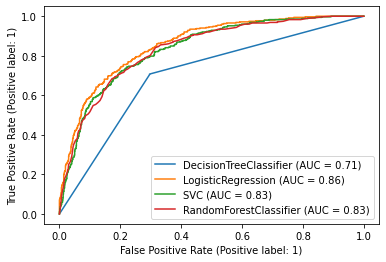

In [54]:
#PLOT THE ROC AUC CURVE
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.show()

In [56]:
results['Model Name'] = model_name
results['Accuracy'] = accuracy
results['Cross Value Score'] = cvs
results['ROC AUC'] = ['0.86', '0.71', '0.83', '0.83']
results

,Model Name,Accuracy,Cross Value Score,ROC AUC
0,Logistic Regression,76.295245,0.803352,0.86
1,Decistion Tree Classifier,70.404542,0.728808,0.71
2,Random Forest Classifier,75.301632,0.790999,0.83
3,SVC,74.237048,0.797389,0.83


In [57]:
#As per the above results, Logistic Regression Classifier is giving the best accuracy.

In [58]:
#Lets try to improve the accuracy score by using GridSearchCV over LR classifier

In [59]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.7625506902502158


In [60]:
logreg2=LogisticRegression(C=0.01,penalty="l2")
logreg2.fit(x_train,y_train)
print("score",logreg2.score(x_test,y_test))

score 0.7579843860894251


In [61]:
#Let's tune the parameter using GridSearchCV
#RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=41)
clf= RandomForestClassifier()
params = { 'n_estimators': [13,15],
			'criterion': ['entropy', 'gini'],
			'max_depth': [10,15],
			'min_samples_split':[10,11],
			'min_samples_leaf':[5,6]
		}
grid=GridSearchCV(clf,param_grid=params)
grid.fit(x_train,y_train)
print('best_params=>', grid.best_params_)
clf=grid.best_estimator_
clf.fit(x_train,y_train)
y_pred_gscv=clf.predict(x_test)
rf_conf_mat=confusion_matrix(y_test,y_pred_gscv)
print('\n Conf Mat =>''\n', rf_conf_mat)
print('\n' ' Accuracy rf Normal =>', accuracy_score(y_test,y_pred_gscv))

report = classification_report(y_test,y_pred_gscv)
print(report)

best_params=> {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 13}

 Conf Mat =>
 [[1409  145]
 [ 269  290]]

 Accuracy rf Normal => 0.804070042593469
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1554
           1       0.67      0.52      0.58       559

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.80      2113



In [62]:
#accuracy post gridsearchcv over RandomForest Classifier is better and hence we will finalise RF Classifier.

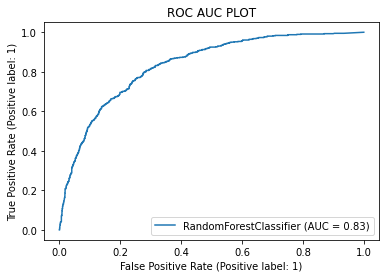

In [63]:
#ROC AUC PLOT
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf,x_test,y_test)
plt.title("ROC AUC PLOT")
plt.show()

# SAVE THE MODEL

In [66]:
import joblib
joblib.dump(clf,'Customer_Churn_Analysis.obj')

['Customer_Churn_Analysis.obj']